# Домашнее задание 1


## Sleep Equation

In [4]:
import numpy as np # linear algebra 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# stats models: regression fitting
import statsmodels.formula.api as smf
# data visualization
import seaborn as sns

Загрузим данные их файла `sleep75.csv` и выведем размер датасета

In [5]:
df = pd.read_csv('/Users/elizavetasikacheva/Econometrica-master/python-notebooks/data-csv/sleep75.csv')
df.shape

(706, 34)

Выведем первые 5 наблюдения

In [6]:
df.head()

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,0,1,0.0,0.0,12,0,0,1,3529,...,0,3438,0,3438,0,14,0,13,7.070004,1024
1,31,0,2,0.0,0.0,14,9500,1,1,2140,...,0,5020,0,5020,0,11,0,0,1.429999,961
2,44,0,3,0.0,0.0,17,42500,1,1,4595,...,1,2815,0,2815,0,21,0,0,20.529997,1936
3,30,0,4,0.0,0.0,12,42500,1,1,3211,...,1,3786,0,3786,0,12,0,12,9.619998,900
4,64,0,5,0.0,0.0,14,2500,1,1,4052,...,1,2580,0,2580,0,44,0,33,2.750000,4096


## Пример 1 (sleep vs totwrk)

построим диаграмму рассеяним **sleep vs totwrk** и вычислим параметры оптимальной прямой

<Axes: xlabel='totwrk', ylabel='sleep'>

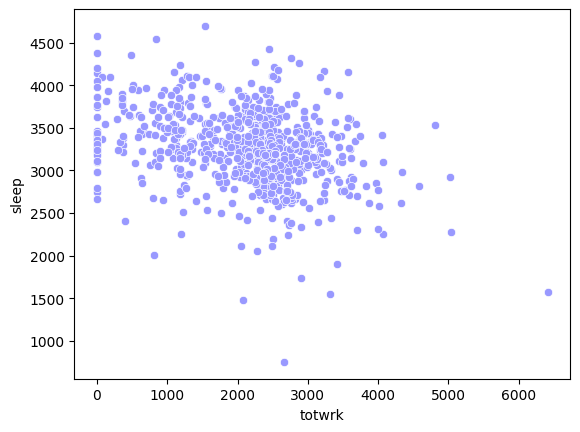

In [20]:
sns.scatterplot(data=df, y='sleep', x='totwrk', color = '#9999FF')

постройте диаграмму рассеяним **sleep vs totwrk** с 'подогнанной' прямой

<Axes: xlabel='totwrk', ylabel='sleep'>

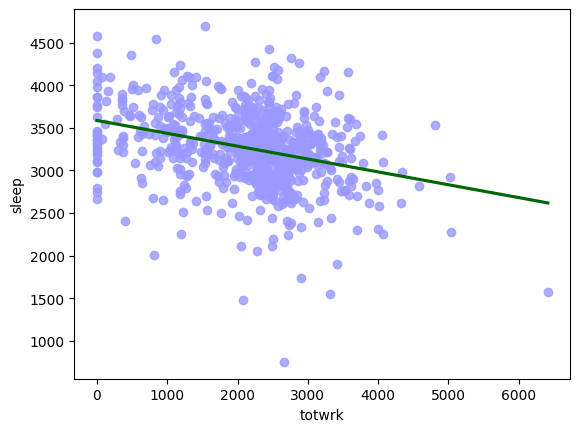

In [21]:
sns.regplot(data=df, y='sleep', x='totwrk', ci=None, line_kws={"color": "#006600"}, color = '#9999FF')

In [9]:
# подгонка прямой
fitted_line = smf.ols(formula='sleep~totwrk', data=df).fit()
# коэффициенты с округлением
fitted_line.params.round(2)

Intercept    3586.38
totwrk         -0.15
dtype: float64

Найдем параметры без константы

In [10]:
# подгонка прямой
fitted_line = smf.ols(formula='sleep~-1+totwrk', data=df).fit()
# коэффициенты с округлением
fitted_line.params.round(2)

totwrk    1.26
dtype: float64

## Пример 2 (sleep vs age)
построим диаграмму рассеяним sleep vs age и вычислим параметры оптимальной прямой

<Axes: xlabel='age', ylabel='sleep'>

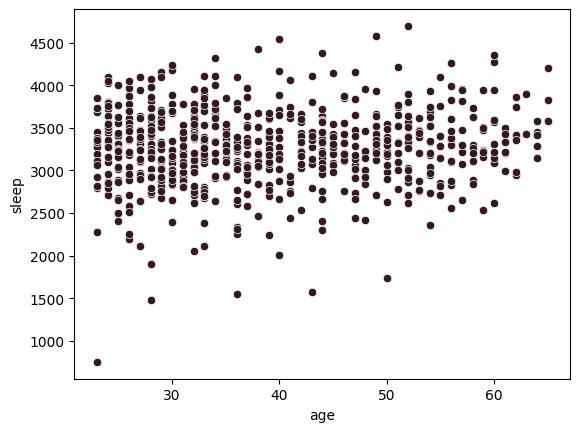

In [23]:
sns.scatterplot(data=df, y='sleep', x='age', color = "#331920")

построим диаграмму рассеяним **sleep vs age** с 'подогнанной' прямой

<Axes: xlabel='age', ylabel='sleep'>

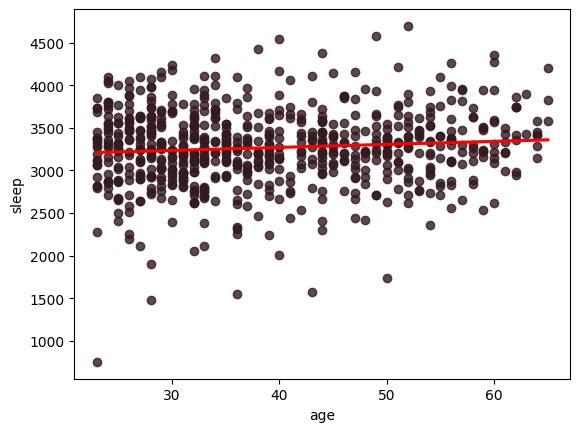

In [26]:
sns.regplot(data=df, y='sleep', x='age', ci=None, line_kws={"color": "red"}, color = "#331920")

In [13]:
# подгонка прямой
fitted_line = smf.ols(formula='sleep~age', data=df).fit()
# коэффициенты с округлением
fitted_line.params.round(2)

Intercept    3128.91
age             3.54
dtype: float64

Найдем параметры без константы

In [14]:
# подгонка прямой
fitted_line = smf.ols(formula='sleep~-1+age', data=df).fit()
# коэффициенты с округлением
fitted_line.params.round(2)

age    77.82
dtype: float64

## Пример 3 (sleep vs totwrk, totwrk^2)

постройте диаграмму рассеяним **sleep vs totwrk** с 'подогнанной' параболой

<Axes: xlabel='totwrk', ylabel='sleep'>

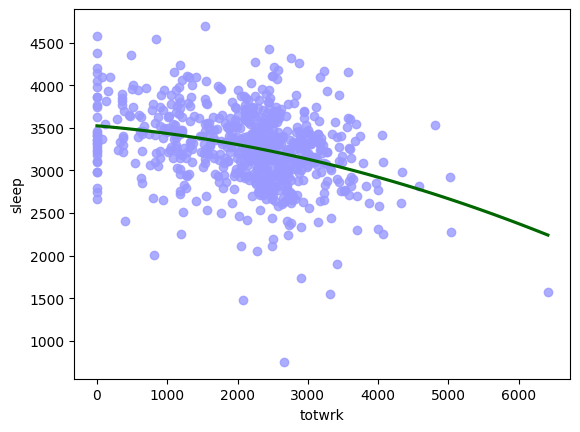

In [22]:
sns.regplot(data=df, y='sleep', x='totwrk', ci=None, order=2, line_kws={"color": "#006600"}, color = '#9999FF')

найти параметры оптимальной параболы **sleep на totwrk, totwrk^2**

In [16]:
# подгонка параболы
fitted_pol = smf.ols(formula='sleep~totwrk+I(totwrk**2)', data=df).fit()
# коэффициенты с округлением
fitted_pol.params.round(2)

Intercept         3523.59
totwrk              -0.07
I(totwrk ** 2)      -0.00
dtype: float64

# Пример 4 (sleep vs age, age^2)

постройте диаграмму рассеяним **sleep vs age** с 'подогнанной' параболой

<Axes: xlabel='age', ylabel='sleep'>

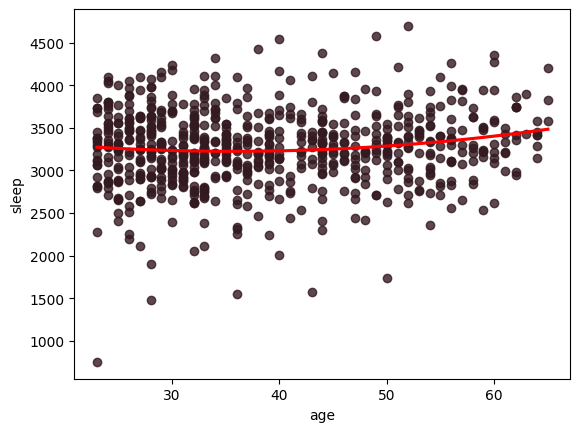

In [28]:
sns.regplot(data=df, y='sleep', x='age', ci=None, order=2, line_kws={"color": "red"}, color = "#331920")

найти параметры оптимальной параболы **sleep на age, age^2**

In [18]:
# подгонка параболы
fitted_pol = smf.ols(formula='sleep~age+I(age**2)', data=df).fit()
# коэффициенты с округлением
fitted_pol.params.round(2)

Intercept      3608.03
age             -21.49
I(age ** 2)       0.30
dtype: float64

## Пример 5 (sleep на totwrk & age)

In [19]:
# подгонка плоскости
fitted_plane = smf.ols(formula='sleep~totwrk+age', data=df).fit()
# коэффициенты с округлением
fitted_plane.params.round(2)

Intercept    3469.20
totwrk         -0.15
age             2.92
dtype: float64